<h1>Zadanie 6</h1>

<h2>CYFROWE PRZETWARZANIE SYGNAŁÓW I OBRAZÓW <br>
Przetwarzanie i analiza sygnału EKG</h2>
<h3>
Kasper Radom 264023 <br>
Maciej Szymczak 263978</h3>

In [1]:
%matplotlib ipympl
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from skimage import filters
from skimage.morphology import disk
from skimage.filters import rank, laplace, sobel, gaussian
from skimage.exposure import rescale_intensity
from IPython.display import display
from matplotlib.widgets import RectangleSelector

image = ski.io.imread('chest-xray.tif')

deklaracja funkcji wczytującej obraz

In [2]:

def readImage(imageName):
    global image
    image = ski.io.imread(imageName)


def showImage():
    plt.figure()
    ski.io.imshow(image)
    plt.title(dropdown.value[:-4])
    ski.io.show()



In [3]:
def multiply_image(image, constant):
    """Mnoży każdy piksel obrazu przez stałą."""
    # Używamy funkcji np.clip, aby upewnić się, że wartości pozostają w dopuszczalnym zakresie.
    return np.clip(image * constant, 0, 255).astype(np.uint8)


def logarithmic_transformation(image, constant):
    """Stosuje transformację logarytmiczną do obrazu."""
    # Skalujemy obraz do zakresu [0, 1], stosujemy transformację, a następnie skalujemy z powrotem.
    normalized_image = image / 255
    transformed_image = constant * np.log(1 + normalized_image)
    return np.clip(transformed_image * 255, 0, 255).astype(np.uint8)


image = ski.io.imread('spectrum.tif')  # Załaduj obraz
multiplied_image = multiply_image(image, 2)  # Przykład mnożenia przez stałą
log_transformed_image = logarithmic_transformation(image, 1)  # Przykład transformacji logarytmicznej

Wyświetlanie obrazów

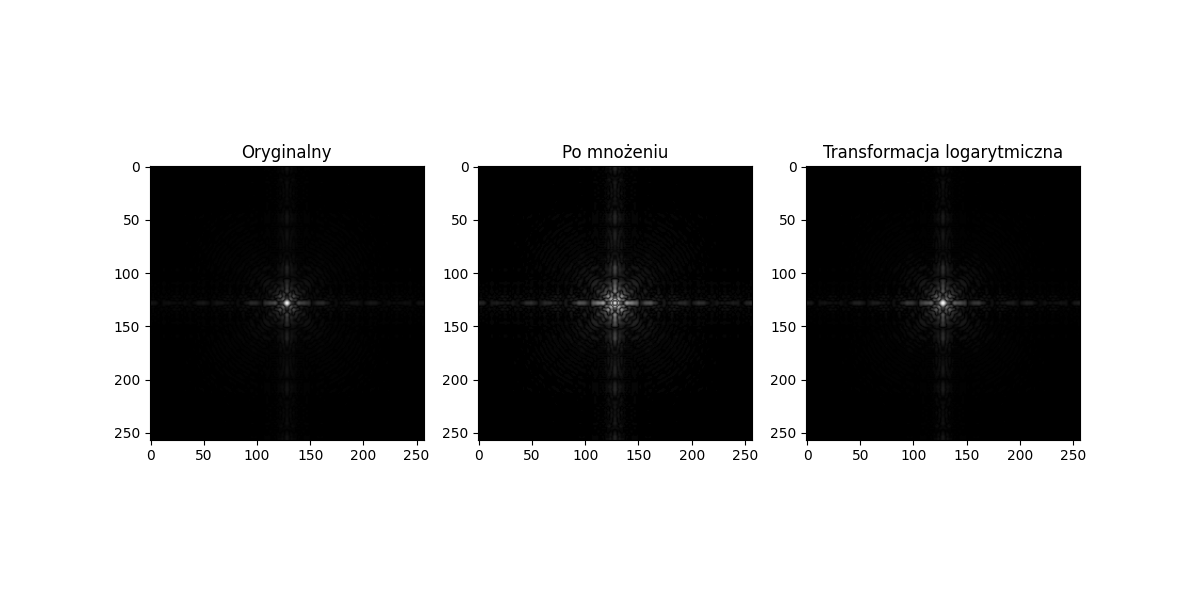

In [4]:
# ORYGINALNY
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Oryginalny')

# a) PO PRZEMNOŻENIU
plt.subplot(1, 3, 2)
plt.imshow(multiplied_image, cmap='gray')
plt.title('Po mnożeniu')

# b) PO TRANSFORMACJI LOGARYTMICZNEJ
plt.subplot(1, 3, 3)
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Transformacja logarytmiczna')
plt.show()


In [5]:

def contrast_adjustment(image, m, e):
    """Zmienia dynamikę skali szarości (kontrast) obrazu."""
    # Przekształcenie kontrastu
    image_float = image.astype(np.float32) / 255.0
    transformed_image = 1 / (1 + (m / (image_float + np.finfo(float).eps)) ** e)
    return np.clip(transformed_image * 255, 0, 255).astype(np.uint8)


# Wyświetlanie wykresu funkcji transformacji kontrastu
def plot_transformation_curve(m, e):
    r = np.linspace(0, 1, 256)
    T_r = 1 / (1 + (m / (r + np.finfo(float).eps)) ** e)
    plt.figure()
    plt.plot(r, T_r, label=f'm={m}, e={e}')
    plt.title('Wykres funkcji transformacji kontrastu')
    plt.xlabel('Wartość wejściowa r')
    plt.ylabel('Wartość wyjściowa T(r)')
    plt.legend()
    plt.show()


Eksperymenty z różnymi wartościami parametrów m i e

In [6]:
m, e = 0.45, 8

Załaduj obraz i wykonaj przekształcenie

In [7]:
image_name = 'einstein-low-contrast.tif'
image = ski.io.imread(image_name)
adjusted_image = contrast_adjustment(image, m, e)

Wyświetl oryginalny i przekształcony obraz

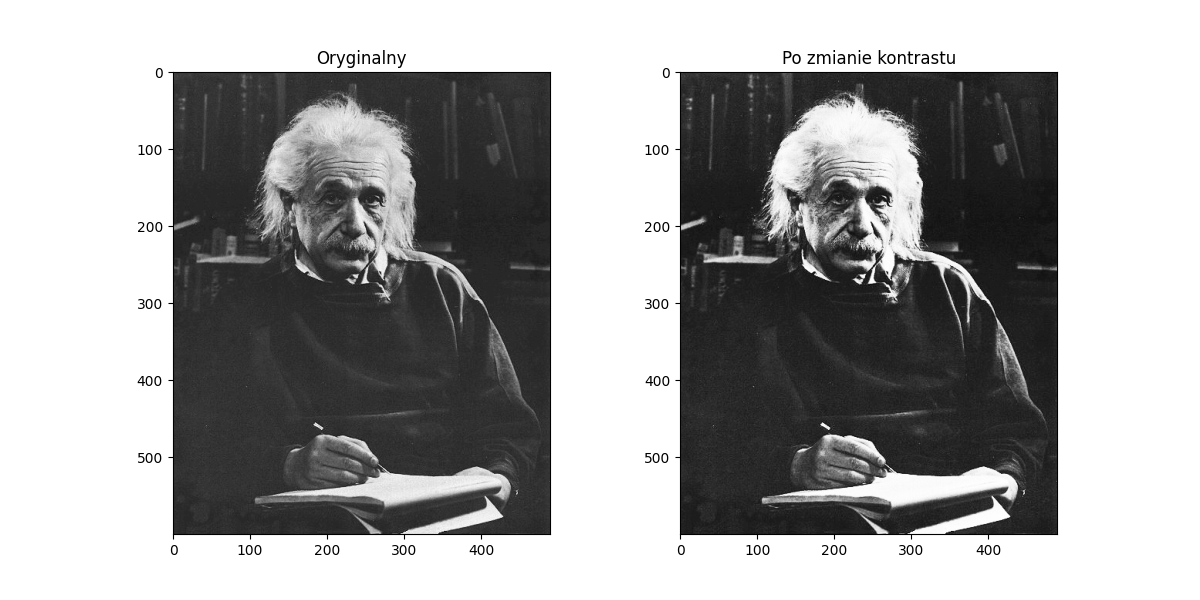

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Oryginalny')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image, cmap='gray')
plt.title('Po zmianie kontrastu')
plt.show()

Wyświetl wykres funkcji transformacji

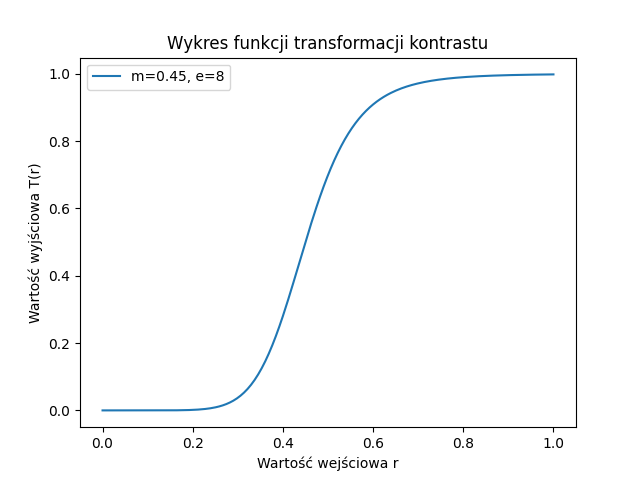

In [9]:
plot_transformation_curve(m, e)

In [10]:
def gamma_correction(image, c, gamma):
    """Stosuje korekcję gamma do obrazu."""
    # Normalizujemy obraz do zakresu [0, 1]
    normalized_image = image.astype(np.float32) / 255.0
    # Stosujemy korekcję gamma
    corrected_image = c * (normalized_image ** gamma)
    # Skalujemy z powrotem do zakresu [0, 255] i konwertujemy do typu uint8
    return np.clip(corrected_image * 255, 0, 255).astype(np.uint8)


Parametry dla przykładu korekcji gamma

In [11]:
c, gamma = 1.0, 2.2  # Przykładowe wartości

Załaduj obraz i wykonaj korekcję gamma

In [12]:
image_name = 'aerial_view.tif'
image = ski.io.imread(image_name)
gamma_corrected_image = gamma_correction(image, c, gamma)

Wyświetl oryginalny i przekształcony obraz

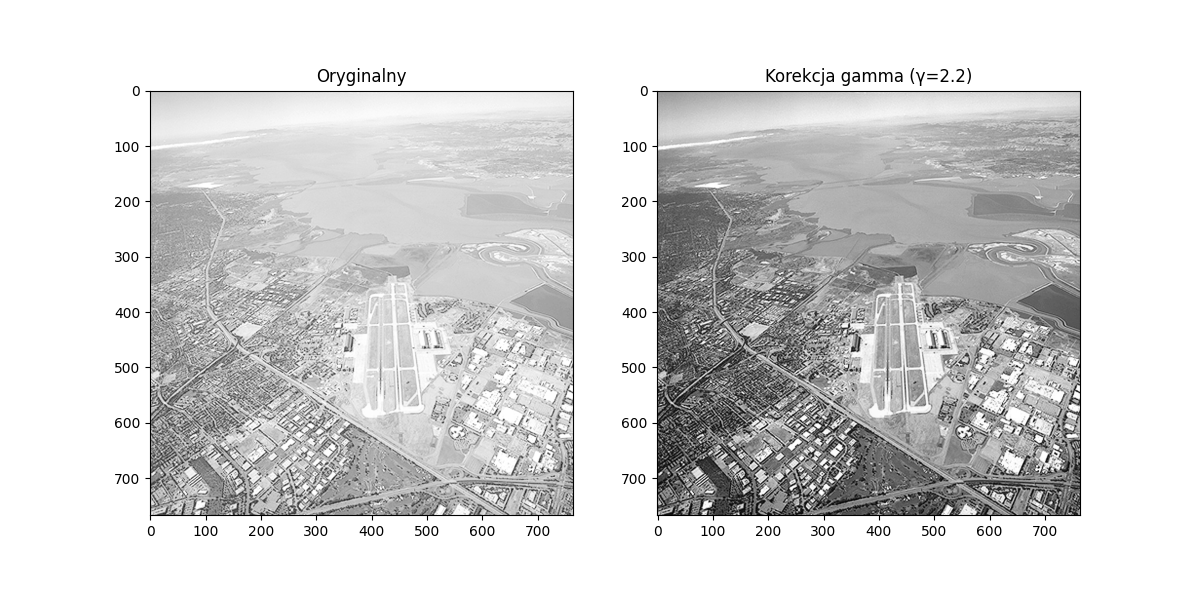

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Oryginalny')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title(f'Korekcja gamma (γ={gamma})')
plt.show()